## Temporal Alignment

Align the stock data with news articles based on dates to correlate market movements with news sentiment.

#### import data

In [613]:
import pandas as pd

In [614]:
df_stocks = pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
df_text = pd.read_csv('data/textual/df_text_Sentiment.csv', sep=",", index_col=0)


#### Data preprocessing 

In [615]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

In [616]:
df_stocks = df_stocks.sort_values(by='Date', ascending=True)
df_text = df_text.sort_values(by='date', ascending=True)
df_stocks = df_stocks.dropna()

In [617]:
df_stocks.head(2)

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
5,2010-01-05,AMZN,6.774000,6.590500,6.734500,6.734500,177038000.0,1,0.589989,0.005900


In [618]:
df_text.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,Sentiment Scores,Compound Score,Overall Sentiment,Month-Year,Sentiment Score,Processed Description
2588,https://www.cnbc.com/2010/04/23/what-makes-up-...,What Makes Up Your Credit Score?,What Makes Up Your Credit Score?,2010-04-23 15:37:59+00:00,"Leslie McFadden, Bankrate.com",Bankrate explains what makes up the three digi...,business news,U. S. NewsWhat Makes Up Your Credit Score?Your...,545,"Leslie McFadden, Bankrate.com","{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.2732,Positive,2010-04,0.9987,bankrate explains make three digit number sign...
6769,https://www.cnbc.com/2011/07/21/recession-cnbc...,Recession: CNBC Explains,CNBC Explains,2011-07-21 16:52:36+00:00,Mark Koba,The U.S. economy has suffered through many re...,business news,"Every few years, countries experience an econo...",1028,Mark Koba,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.7003,Negative,2011-07,-0.9996,u economy suffered many recession history rece...


##### see if "authors" and "combined authors" are different

In [619]:
# Assuming 'df' is your DataFrame
# Normalize the text for comparison by stripping whitespace and converting to lowercase
normalized_authors = df_text['author'].str.strip().str.lower()
normalized_combined_authors = df_text['Combined Authors'].str.strip().str.lower()

# Find discrepancies between the two columns
discrepancies = df_text[normalized_authors != normalized_combined_authors]

# Display rows where the authors and combined authors are different
discrepancies.head()


,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,Sentiment Scores,Compound Score,Overall Sentiment,Month-Year,Sentiment Score,Processed Description
7909,https://www.cnbc.com/sok-hui-chng-dbs-bank/,"Sok Hui Chng, DBS Bank","Sok Hui Chng, DBS Bank",2013-10-18 15:56:29+00:00,NaN,Sok Hui Chng is the Chief Financial Officer of...,business news,Sok Hui Chng is the Chief Financial Officer of...,242,NaN,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.3182,Positive,2013-10,0.9726,sok hui chng chief financial officer db group ...
7948,https://www.cnbc.com/guy-look-sa-sa-internatio...,"Guy Look, Sa Sa International Holdings","Guy Look, Sa Sa International Holdings",2013-10-18 15:57:34+00:00,NaN,Chief financial officer and Executive Director...,business news,"Mr Look is the CFO, Executive Director, and a ...",179,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2013-10,0.6124,chief financial officer executive director sa ...
7952,https://www.cnbc.com/heather-xie-global-logist...,"Kazuhiro Tsutsumi, Global Logistic Properties","Kazuhiro Tsutsumi, Global Logistic Properties",2013-10-18 15:58:48+00:00,NaN,Kazuhiro Tsutsumi is the Chief Financial Offic...,business news,Kazuhiro Tsutsumi is CFO of GLP. Kaz spearhead...,177,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2013-10,0.6597,kazuhiro tsutsumi chief financial officer glob...
7927,https://www.cnbc.com/harmit-singh-levi-strauss...,"Harmit Singh, Levi Strauss & Co.","Harmit Singh, Levi Strauss & Co.",2014-09-30 13:25:21+00:00,NaN,Harmit Singh is executive vice president and c...,business news,Harmit Singh is executive vice president and c...,191,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2014-09,0.9422,harmit singh executive vice president chief fi...
7922,https://www.cnbc.com/geraldine-matchett-dsm--c...,"Geraldine Matchett, DSM","Geraldine Matchett, DSM",2015-01-13 14:48:41+00:00,NaN,"As of 1 December 2014, Geraldine became Royal ...",business news,"Prior to her appointment, Geraldine Matchett w...",175,NaN,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",0.4939,Positive,2015-01,0.6705,december geraldine became royal dsm chief fina...


In [620]:
df_text.drop('Combined Authors', axis=1, inplace=True)


In [621]:
df_text.isnull().sum()

url                        0
softTitle                  0
title                      0
date                       0
author                   205
description               24
keywords                 408
text                       0
Article Length             0
Sentiment Scores           0
Compound Score             0
Overall Sentiment          0
Month-Year                 0
Sentiment Score            0
Processed Description     24
dtype: int64

##### Filling null values 

In [622]:
# Impute missing 'author'  with 'Unknown'
df_text['author'].fillna('Unknown', inplace=True)

# Impute missing 'keywords' with 'No Keywords'
df_text['keywords'].fillna('No Keywords', inplace=True)

# Impute missing 'description' with 'No description'
df_text['description'].fillna('No description', inplace=True)
df_text['Processed Description'].fillna('No description', inplace=True)

#### Determining what timeline to use 

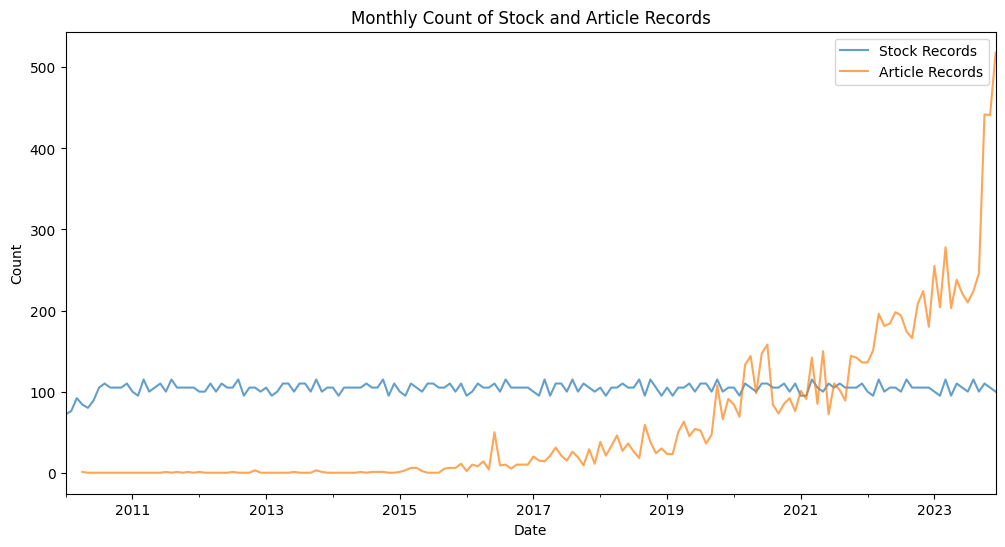

In [623]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_stock and df_article are your dataframes for stocks and articles, respectively
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

# Resample to monthly frequency and count the number of records
stock_counts = df_stocks.resample('M', on='Date').size()
article_counts = df_text.resample('M', on='date').size()

# Plot the data
plt.figure(figsize=(12, 6))
stock_counts.plot(label='Stock Records', alpha=0.7)
article_counts.plot(label='Article Records', alpha=0.7)
plt.title('Monthly Count of Stock and Article Records')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


#### MERGE

In [624]:
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Ensure the date columns in both datasets have the same name
df_stocks.rename(columns={'Date': 'date'}, inplace=True)

# Now you can merge using the 'on' parameter and there won't be duplicate date columns
df = pd.merge(df_text, df_stocks, on='date', how='outer')
df = df.sort_values(by='date', ascending=True)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [625]:
'''
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Merge the datasets based on the date
df = pd.merge(df_text, df_stocks, left_on='date', right_on='Date', how='outer')
df.drop('Date', axis=1, inplace=True)
df = df.sort_values(by='date', ascending=True)
df.head(2)


df
'''

"\n# Let's ensure both datasets are aligned in terms of the date format\ndf_stocks['Date'] = df_stocks['Date'].dt.date\ndf_text['date'] = df_text['date'].dt.date\n\n# Merge the datasets based on the date\ndf = pd.merge(df_text, df_stocks, left_on='date', right_on='Date', how='outer')\ndf.drop('Date', axis=1, inplace=True)\ndf = df.sort_values(by='date', ascending=True)\ndf.head(2)\n\n\ndf\n"

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53652 entries, 0 to 53651
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    44373 non-null  object        
 1   softTitle              44373 non-null  object        
 2   title                  44373 non-null  object        
 3   date                   53652 non-null  datetime64[ns]
 4   author                 44373 non-null  object        
 5   description            44373 non-null  object        
 6   keywords               44373 non-null  object        
 7   text                   44373 non-null  object        
 8   Article Length         44373 non-null  float64       
 9   Sentiment Scores       44373 non-null  object        
 10  Compound Score         44373 non-null  float64       
 11  Overall Sentiment      44373 non-null  object        
 12  Month-Year             44373 non-null  object        
 13  S

In [627]:
# Assuming 'df' is your merged DataFrame and you have already formatted the 'date' column as a date
df['date'] = pd.to_datetime(df['date'])

# Define your start date
start_date = pd.to_datetime('2015-01-01')

# Filter the DataFrame
df = df[df['date'] >= start_date]

In [628]:
df.head(1)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Sentiment Scores,...,Processed Description,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
6178,NaN,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TSLA,14.883333,14.217333,14.620667,14.620667,71466000.0,1.0,-1.393818,-0.013938


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47474 entries, 6178 to 53651
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    44284 non-null  object        
 1   softTitle              44284 non-null  object        
 2   title                  44284 non-null  object        
 3   date                   47474 non-null  datetime64[ns]
 4   author                 44284 non-null  object        
 5   description            44284 non-null  object        
 6   keywords               44284 non-null  object        
 7   text                   44284 non-null  object        
 8   Article Length         44284 non-null  float64       
 9   Sentiment Scores       44284 non-null  object        
 10  Compound Score         44284 non-null  float64       
 11  Overall Sentiment      44284 non-null  object        
 12  Month-Year             44284 non-null  object        
 13  Sen

### EDA

#### looking at distribution to decide between mean/medium 

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

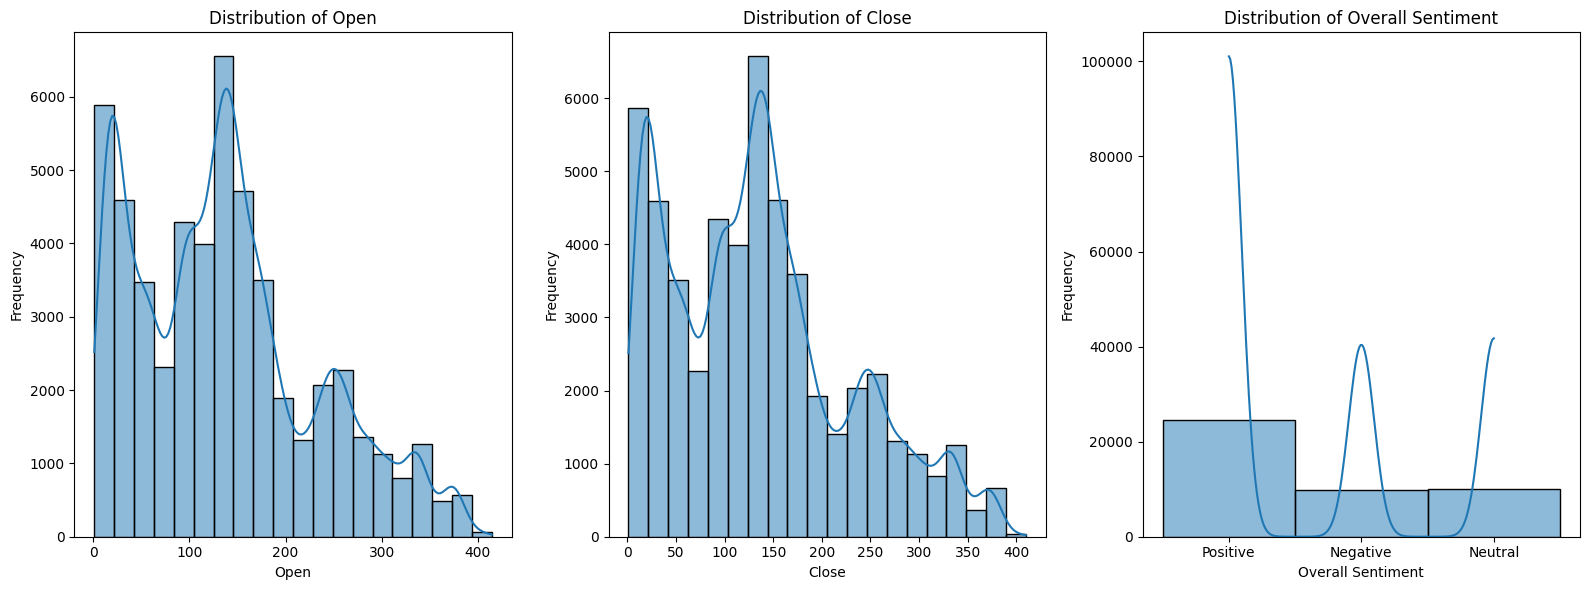

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Open', 'Close', 'Overall Sentiment']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [334]:
df.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Sentiment Scores,...,Processed Description,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,AMZN,6.774000,6.590500,6.734500,6.734500,177038000.0,1.0,0.589989,0.005900
1,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1.0,0.172893,0.001729


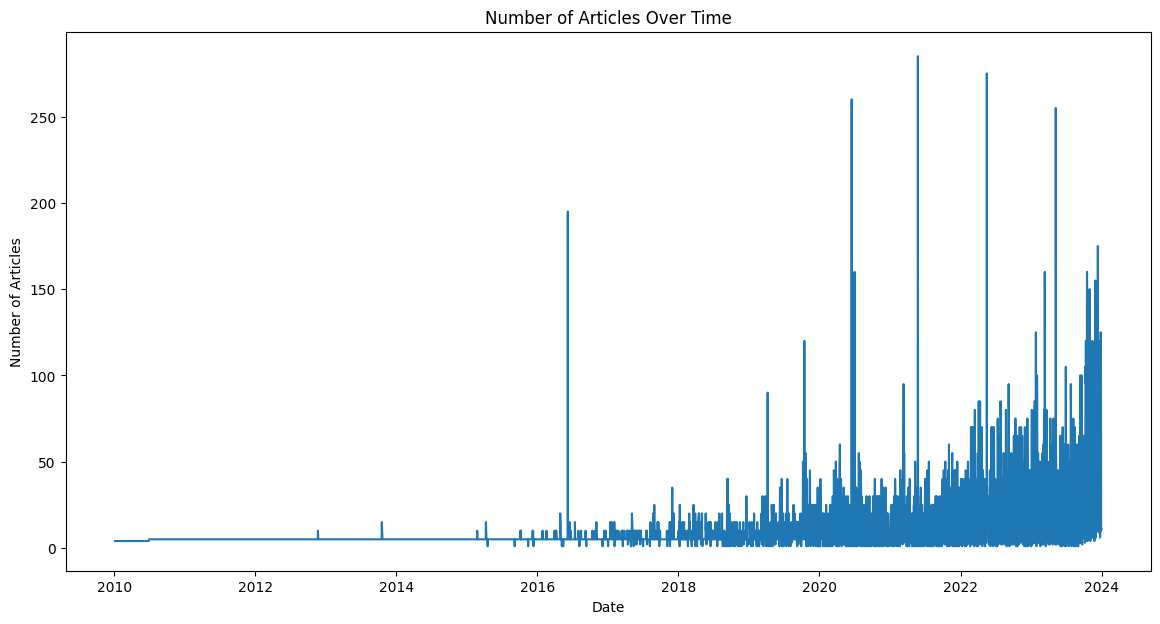

In [335]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now that 'date' is in datetime format, group by date (without time component) and count the articles
articles_over_time_filtered = df.groupby(df['date'].dt.date).size()

# If you're plotting, ensure to include the plotting library and use the correct plotting commands
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
articles_over_time_filtered.plot(kind='line')  # Assuming you want a line plot
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


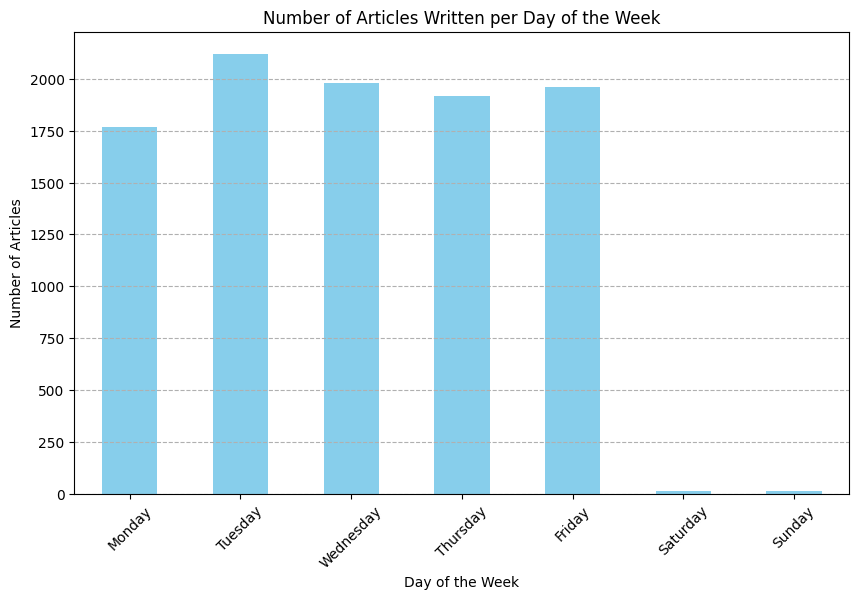

In [336]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_text['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_text['day_of_week'] = df_text['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_text['day_name'] = df_text['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_text.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Written per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


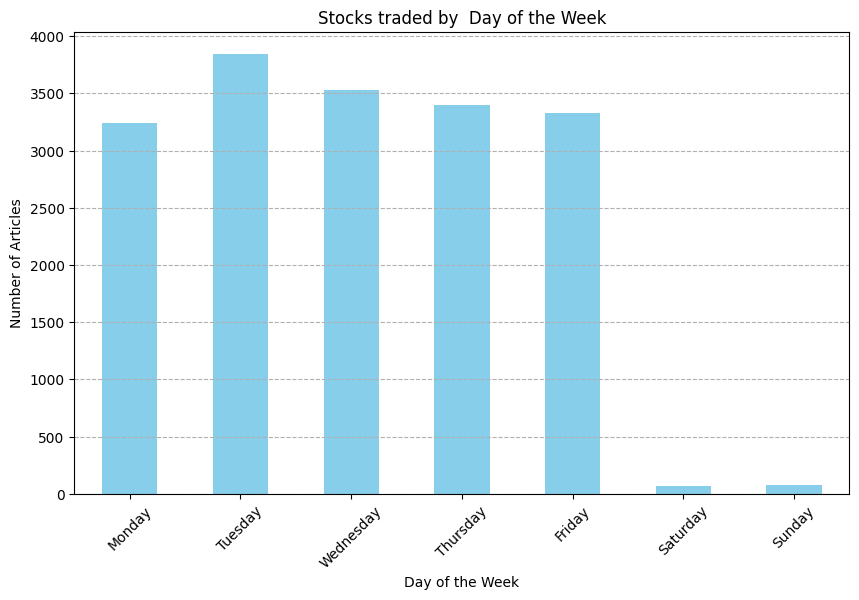

In [337]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Weekend activity 

In [338]:
# Alternatively, if you used 'day_name':
weekend_articles_text = df_text[(df_text['day_name'] == 'Saturday') | (df_text['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles_text)


24

In [339]:
# Alternatively, if you used 'day_name':
weekend_articles = df_stocks[(df_stocks['day_name'] == 'Saturday') | (df_stocks['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles)


142

#### Null Values

In [340]:
## replace null values with Median
import numpy as np

df['Open'] = df['Open'].fillna(df['Open'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())

In [341]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
url,9279,0.172948
softTitle,9279,0.172948
title,9279,0.172948
date,0,0.000000
author,9279,0.172948
description,9279,0.172948
keywords,9279,0.172948
text,9279,0.172948
Article Length,9279,0.172948
Sentiment Scores,9279,0.172948


In [342]:
# Filter the DataFrame to only include rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]

C:\Users\ethan\AppData\Local\Temp\ipykernel_5212\371439882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek
C:\Users\ethan\AppData\Local\Temp\ipykernel_5212\371439882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)


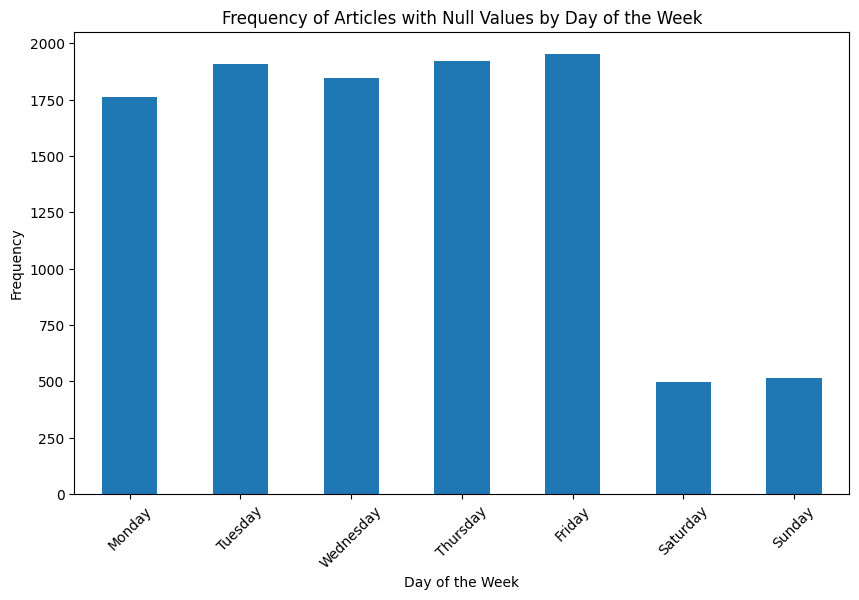

In [343]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_with_nulls' is your DataFrame and it already has a 'date' column in datetime format

# Calculate day of the week for each date (Monday=0, Sunday=6)
df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek

# Map day of the week to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)

# Count occurrences for each day of the week
day_counts = df_with_nulls['day_name'].value_counts().reindex(day_names.values())

# Plotting
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Frequency of Articles with Null Values by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.show()


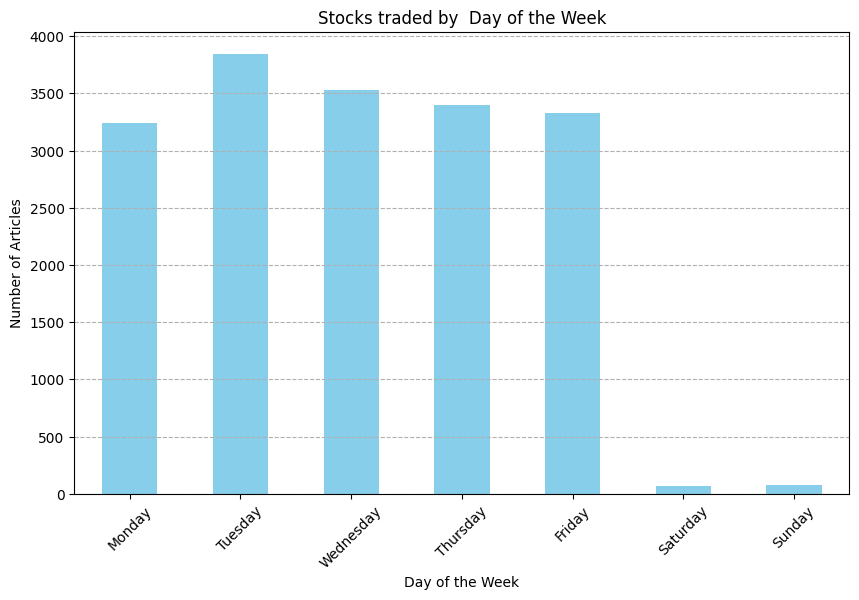

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_5212\1854889488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_days['date'] = pd.to_datetime(stock_days['date'])
C:\Users\ethan\AppData\Local\Temp\ipykernel_5212\1854889488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_days['date'] = pd.to_datetime(article_days['date'])


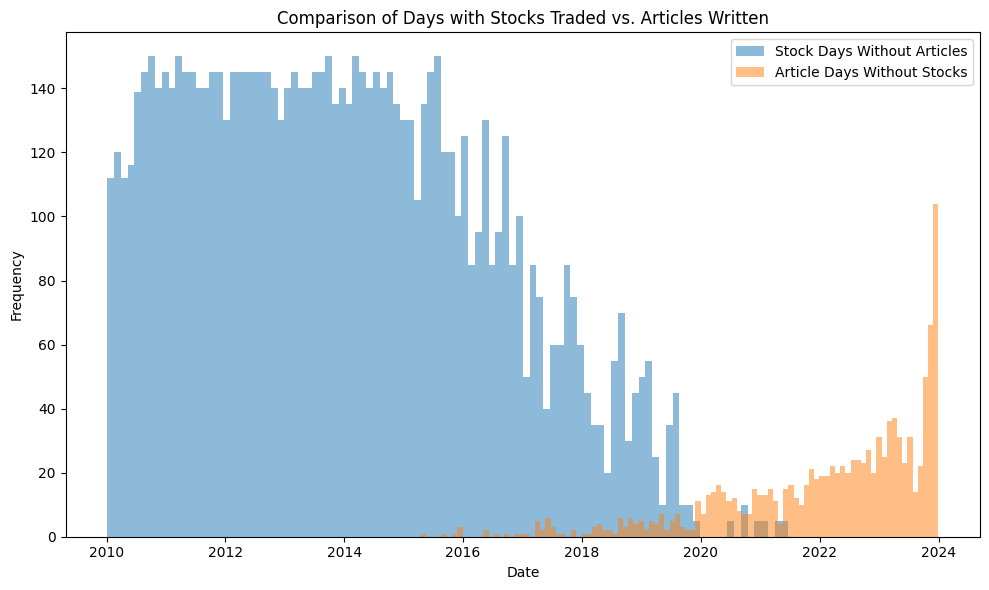

In [345]:
import matplotlib.pyplot as plt
import pandas as pd

stock_days = df[df['Stock'].notna() & df['url'].isna()]

# Filter for days with article data but no stock data (assuming there's a way to identify these)
article_days = df[df['Stock'].isna() & df['url'].notna()]

# Convert date columns to datetime
stock_days['date'] = pd.to_datetime(stock_days['date'])
article_days['date'] = pd.to_datetime(article_days['date'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram for stock days
plt.hist(stock_days['date'], bins=100, alpha=0.5, label='Stock Days Without Articles')

# Plot histogram for article days (Modify this based on actual data scenario)
plt.hist(article_days['date'], bins=100, alpha=0.5, label='Article Days Without Stocks')

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Comparison of Days with Stocks Traded vs. Articles Written')
plt.legend()
plt.tight_layout()
plt.show()


In [346]:
df_with_nulls.to_csv('data/df_with_nulls.csv')

In [347]:
df_with_nulls.head()

,url,softTitle,title,date,author,description,keywords,text,Article Length,Sentiment Scores,...,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change,day_of_week,day_name
0,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,6.774000,6.590500,6.734500,6.734500,177038000.0,1.0,0.589989,0.005900,1,Tuesday
1,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,7.699643,7.616071,7.656429,6.490199,601904800.0,1.0,0.172893,0.001729,1,Tuesday
2,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,15.637387,15.480475,15.541497,15.541497,120638494.0,1.0,-0.440364,-0.004404,1,Tuesday
3,NaN,NaN,NaN,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,31.100000,30.639999,30.959999,23.482508,49749600.0,1.0,0.032305,0.000323,1,Tuesday
4,NaN,NaN,NaN,2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,31.080000,30.520000,30.770000,23.338394,58182400.0,1.0,-0.613691,-0.006137,2,Wednesday


In [348]:
df.isnull().sum()

url                      9279
softTitle                9279
title                    9279
date                        0
author                   9279
description              9279
keywords                 9279
text                     9279
Article Length           9279
Sentiment Scores         9279
Compound Score           9279
Overall Sentiment        9279
Month-Year               9279
Sentiment Score          9279
Processed Description    9279
Stock                    1119
Open                        0
Low                      1119
Close                       0
Adjusted_Close           1119
Volume                   1119
Month                    1119
Price_Change_Pct         1119
Adjusted_Close_Change    1119
dtype: int64

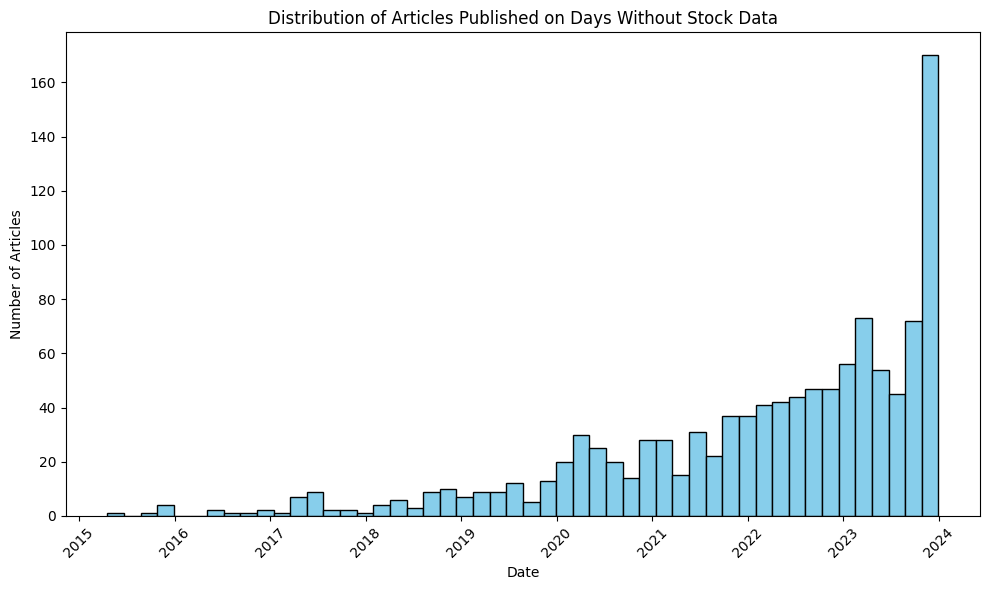

In [349]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the merged data
filtered_dataset = df[df['Stock'].isnull()]
dates_with_null_stock = filtered_dataset['date']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dates_with_null_stock, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Articles Published on Days Without Stock Data')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


delete all the days where an aritlces wan't published 

also figure out how to ttake care of thet null values